<a href="https://colab.research.google.com/github/nikhil-xyz/Computer_Vision/blob/main/Face_Recognition_Attendance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
!git clone https://github.com/nikhil-xyz/Computer_Vision.git

Cloning into 'Computer_Vision'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 47 (delta 8), reused 27 (delta 4), pack-reused 0
Unpacking objects: 100% (47/47), done.


In [102]:
!pip install cmake dlib face_recognition opencv-python 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [103]:
import cv2
import numpy as np
import face_recognition
import matplotlib.pyplot as plt
import os

In [105]:
from google.colab.patches import cv2_imshow

In [106]:
path = os.path.join('Computer_Vision', 'data', 'Face_Recognition_Attendance', 'Samples')

In [94]:
import pathlib

In [107]:
images = []
classnames = []
mylist = os.listdir(path)
for i in mylist:
  curImg = cv2.imread(f'{path}/{i}')
  images.append(curImg)
  classnames.append(os.path.splitext(i)[0])

In [108]:
print(classnames)

['nikhil', 'darshu', 'kau']


In [109]:
print(len(images))

3


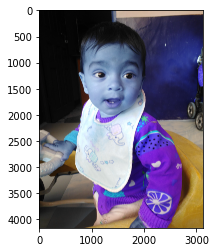

In [110]:
plt.imshow(images[1])

In [113]:
def findEncodings(images):
  encodings = []
  for img in images:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    encode = face_recognition.face_encodings(img)[0]
    encodings.append(encode)
  return encodings

In [114]:
encodeList = findEncodings(images)
print(len(encodeList))

3


In [140]:
cap = cv2.VideoCapture(0)

False


TypeError: ignored

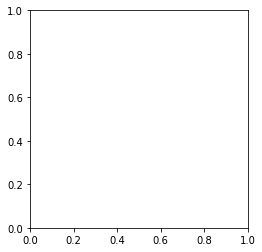

In [141]:
while True:
  flag, xyz = cap.read()
  print(flag)
  plt.imshow(xyz)
 # curImg = cv2.resize(img, (0,0))
  img = cv2.cvtColor(xyz, cv2.COLOR_BGR2RGB)

  curFrame = face_recognition.face_locations(xyz)
  curEncoding = face_recognition.face_encodings(xyz, curFrame)

  for encoding, location in zip(curEncoding, curFrame):
    matches = face_recognition.compare_faces(encodeList, encoding)
    distance = face_recognition.face_distance(encodeList, encoding)
    index = np.argmin(distance)

    if (matches[index]):
      name = classnames[index].upper()
      print(name)